PCA Done. Reduced dimensions from 87 to 16.
Variance Explained: 90.01%

*** CLUSTER RESULTS (K-Means on Top 16 PCs) ***

Cluster 0 (154 jobs): Broadcast Technicians, Pest Control Workers, Agricultural Inspectors, Career/Technical Education Teachers, Middle School, First-Line Supervisors of Construction Trades and Extraction Workers, Adapted Physical Education Specialists, Ophthalmic Medical Technologists, Prosthodontists
Cluster 1 (120 jobs): Brokerage Clerks, Preschool Teachers, Except Special Education, Human Resources Specialists, Teaching Assistants, Preschool, Elementary, Middle, and Secondary School, Except Special Education, Library Technicians, Reservation and Transportation Ticket Agents and Travel Clerks, Broadcast Announcers and Radio Disc Jockeys, Insurance Claims and Policy Processing Clerks
Cluster 2 (114 jobs): Watch and Clock Repairers, Parking Attendants, Parking Enforcement Workers, Helpers--Pipelayers, Plumbers, Pipefitters, and Steamfitters, Baristas, Graders and So

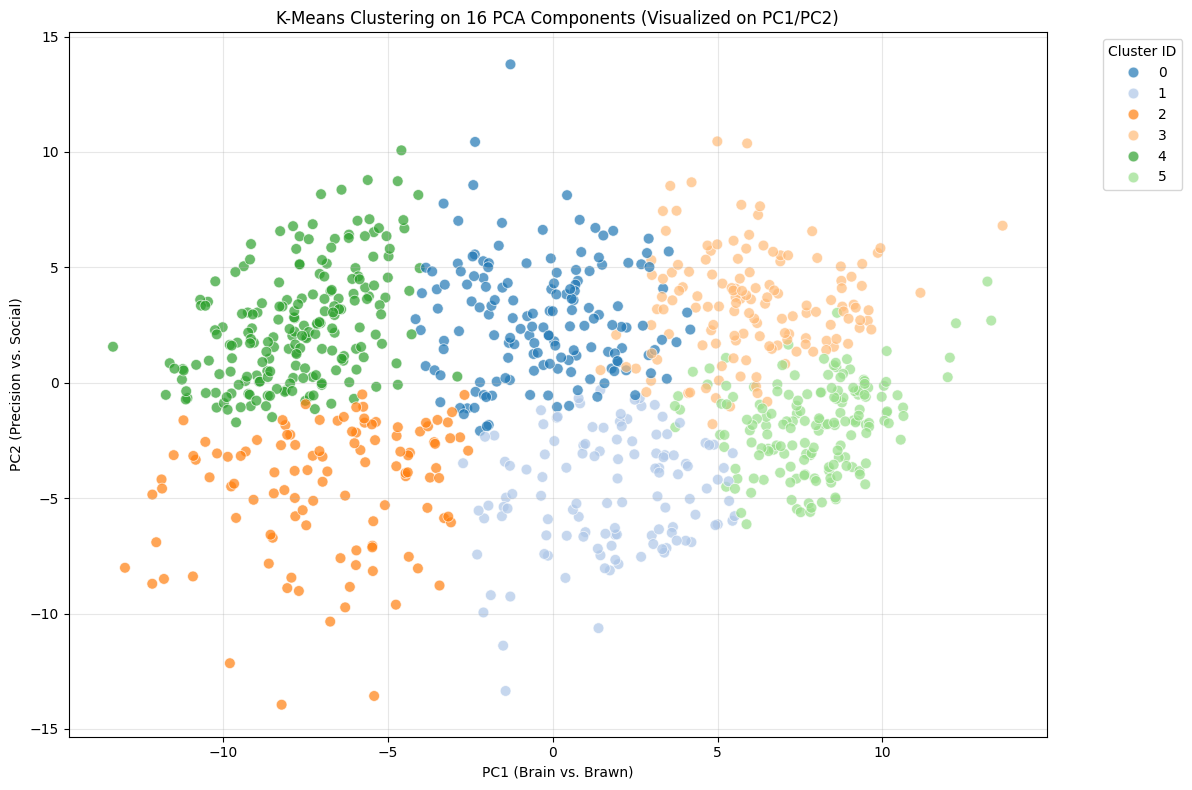

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- STEP 1: LOAD & PREP ---
# Read your saved file
df =  pd.read_csv('../Data/career_pivot_results.csv')

# Reset Index (Lock Title & Code as labels, not math)
# Note: Adjust column names if your CSV has them slightly different
df.set_index(['O*NET-SOC Code', 'Title'], inplace=True)

# Drop any old cluster columns to avoid cheating
cols_to_drop = [c for c in df.columns if 'Cluster' in c]
df_clean = df.drop(columns=cols_to_drop)

# Create Matrix X
X = df_clean.values

# --- STEP 2: SCALE & PCA ---
# Scale first (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA to get the top 16 "Essence" dimensions
pca_16 = PCA(n_components=16)
X_pca_16 = pca_16.fit_transform(X_scaled)

print(f"PCA Done. Reduced dimensions from {X.shape[1]} to {X_pca_16.shape[1]}.")
print(f"Variance Explained: {np.sum(pca_16.explained_variance_ratio_):.2%}")

# --- STEP 3: K-MEANS ON PCA DATA ---
# We use K=12 (based on your previous findings that K=6 was too broad)
kmeans_pca = KMeans(n_clusters=6, random_state=42, n_init=20)
labels = kmeans_pca.fit_predict(X_pca_16)

# Save labels back to DataFrame
df['PCA_KMeans_Cluster'] = labels

# --- STEP 4: EVALUATE (The Bartender Test) ---
print(f"\n*** CLUSTER RESULTS (K-Means on Top 16 PCs) ***\n")

for i in range(6):
    # Get jobs in this cluster
    jobs = df[df['PCA_KMeans_Cluster'] == i].index.get_level_values('Title')
    
    # Print random sample
    sample = np.random.choice(jobs, min(len(jobs), 8), replace=False)
    print(f"Cluster {i} ({len(jobs)} jobs): {', '.join(sample)}")

# --- STEP 5: VISUALIZE (PC1 vs PC2) ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca_16[:, 0], 
    y=X_pca_16[:, 1], 
    hue=labels, 
    palette='tab20', 
    s=60, 
    alpha=0.7,
    legend='full'
)
plt.title('K-Means Clustering on 16 PCA Components (Visualized on PC1/PC2)')
plt.xlabel('PC1 (Brain vs. Brawn)')
plt.ylabel('PC2 (Precision vs. Social)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster ID')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()